In [1]:
import os
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [2]:
# 데이터셋 샘플 생성
N = 1000
data1 = np.random.randn(N//3, 2) + np.array([5, 6])
data2 = np.random.randn(N//3, 2) + np.array([-5, -6])
data3 = np.random.randn(N//3, 2) + np.array([-10, 3])
data = np.concatenate((data1, data2, data3))

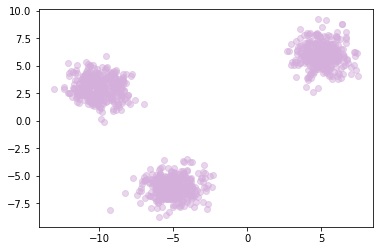

In [3]:
plt.scatter(data[:,0], data[:,1], c='#D5AFDC', alpha=0.5)
plt.show()

In [4]:
from sklearn.cluster import KMeans

Kmeans = KMeans(
    init='random',
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Kmeans.fit(data)

KMeans(init='random', n_clusters=3, random_state=42)

In [5]:
Kmeans.labels_  # 예측한 라벨값

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [6]:
def plot_cluster(data, labels, title=None):
    colors = ['#D5AFDC','#56DBDB','#A8E19A']
    for i, c in enumerate(colors):
        data_i = data[labels==i]
        plt.scatter(data_i[:,0],data_i[:,1], c=colors[i], alpha=0.5)
        
    if title is not None:
        plt.title(title)
    plt.show()

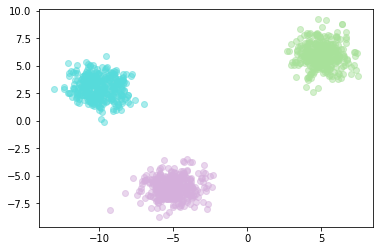

In [7]:
plot_cluster(data, Kmeans.labels_)

In [8]:
kmeans_kwargs = {
    "init": "random",
    "random_state": 42
}

# SSE: 예측값 - 실제값
inertia_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    inertia_list.append(kmeans.inertia_)  
    # inertia: 군집의 응집도: 군집내 데이터들과 중심간의 거리의 합 -> 값이 작을수록 군집화 잘 된 것이다.
    # inertia값이 급격히 떨어지는 지점이 적정 군집수라고 판단(Elbow method)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


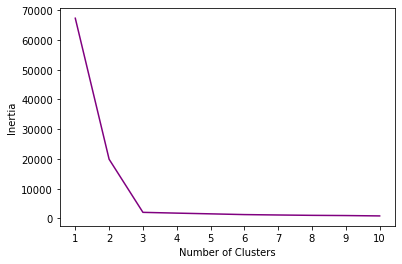

In [9]:
plt.plot(range(1, 11), inertia_list, c='purple')
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [10]:
# !pip install kneed

In [11]:
# 곡선으로 팔꿈치 지점을 선택하는 데 문제가 있을 때
# kneed를 이용해서 팔꿈치 지점을 식별해보자

from kneed import KneeLocator
kl = KneeLocator(range(1, 11), inertia_list, curve="convex", direction="decreasing")
kl.elbow

3

In [12]:
# 실루엣 계수로 평가
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data)
    score = silhouette_score(data, kmeans.labels_)
    silhouette_coefficients.append(score)

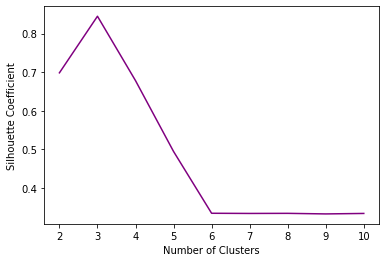

In [13]:
plt.plot(range(2, 11), silhouette_coefficients, c='purple')
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [14]:
# 실루엣계수(silhouette coefficient)
# -1 ~ 1 사이의 값을 가지며, 1에 가까울수록 좋다.
# 1에 가까우면: 군집의 중심에 가까이 있다.
# 0에 가까우면: 군집의 경계에 위치한다.
# -1에 가까우면: 잘못된 군집에 할당되어 있다.

In [15]:
# 다만 데이터 형태에 따라 실루엣계수로 평가를 내리는 것이 잘못된 경우가 있다.
# 대표적인 예로 초승달 모양 데이터를 들 수 있다.

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

In [17]:
features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(features)
dbscan.fit(features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    features, kmeans.labels_
).round(2)

dbscan_silhouette = silhouette_score(
   features, dbscan.labels_
).round (2)

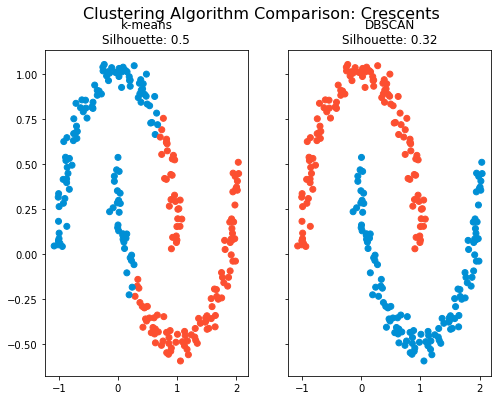

In [18]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(features[:, 0], features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)
# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(features[:, 0], features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

In [19]:
kmeans_silhouette, dbscan_silhouette

(0.5, 0.32)

In [20]:
# DBSCAN에서 데이터를 더 잘 군집화했음에도 불구하고 실루엣계수 점수는 K-means가 더 좋게 나온다.

In [21]:
# ARI는 실제 레이블과 예측 레이블 간의 유사성을 측정
# 초승달 데이터는 실제 레이블이 존재하기 때문에 ARI를 측정할 수 있다.

ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
round(ari_kmeans, 2), round(ari_dbscan, 2)

(0.25, 1.0)

In [22]:
# ARI의 출력값의 범위 또한 -1 ~ 1이다.
# ARI 점수에서는 DBSCAN이 더 좋은 모델로 평가된다.
# 따라서 데이터에 걸맞는 평가 방법을 선택해야 함을 알 수 있다.